# Home Assignment 1
Due by 8th May, 2024 at 23:59 CEST

## Neural Network Basics

We want to create a 2 layer NN, which means we want to calculate  $y = W_2 * ReLU(W_1 * x + b_1) + b_2$

Complete the TODOs below to create such a NN.

Since you will be needing to compute the gradients w.r.t. all parameters, you may look into online resources for help. Please cite or link any online recources you do use.

You are allowed to change any existing parts, however the code has to remain easy to understand and well documented.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    """
    ReLU activation function
    
    Parameters:
        x (np.ndarray): numpy array with shape (m, n) where m is the number of dimensions and n is the number of points
        
    Returns:
        x' (np.ndarray): return value of the pointwise ReLU application
    """
    return np.maximum(0, x)


def relu_grad(x):
    # TODO: Write a function given a numpy array that calculates the gradient of the ReLU function w.r.t. `x`
    # TODO: Also write the derivation of the gradient in the PDF file In the implementation you may simply use the final derivation.
    # Hint: The function should return a numpy array of the same dimension that `x` has, but only containing 0 or 1
    arr = np.zeros(x.shape)
    return np.greater(x, arr).astype(int)


In [68]:
class NumPyNeuralNet:
    
    def __init__(self, dim_in, dim_hidden, dim_out):
        self.dim_in = dim_in
        self.dim_hidden = dim_hidden
        self.dim_out = dim_out
        
        # TODO: Randomly initialize the weight matrices W_1, W_2 and biases b_1, b_2
        # Hint: use np.random.randn() and make sure to correctly set the dimensions 

        # Scale random sample with 0.01 according to lecture
        self.W_1 = 0.01 * np.random.randn(self.dim_in, self.dim_hidden)
        self.b_1 = 0.01 * np.random.randn(self.dim_hidden)
        self.W_2 = 0.01 * np.random.randn(self.dim_hidden, self.dim_out)
        self.b_2 = 0.01 * np.random.randn(self.dim_out)

    def predict(self, x):
        """
        Calculates the output of the neural network for the given x.
        
        Parameters:
            x (np.ndarray): input value numpy array
        
        Returns:
            y (np.ndarray): predicted output for `x`
        """
        # TODO: Calculate output self.out
        # Safe intermediate results as cache for later backpropagation
        self.h_1 = np.dot(x, self.W_1) + self.b_1
        self.h_1_act = relu(self.h_1)
        self.out = np.dot(self.h_1_act, self.W_2) + self.b_2
        return self.out
    
    
    def loss(self, x, y):
        """
        Calculates the Mean-Squared Error and returns the gradients w.r.t. to the parameters.
        
        Parameters:
            x (np.ndarray): input value numpy array with shape (self.dim_in, n)
            y (np.ndarray): ground truth value numpy array with shape (self.dim_out, n)
            
        Returns:
            loss (float): Mean-Squared-Error between predicted value on input points and ground truth value
            W_1_grad (np.ndarray): gradient w.r.t W_1   
            W_2_grad (np.ndarray): gradient w.r.t W_2  
            b_1_grad (np.ndarray): gradient w.r.t b_1   
            b_2_grad (np.ndarray): gradient w.r.t b_2   
        """
        # TODO: Calculate the loss (Mean-Squared-Error)
        # Hint: use np.square() and np.mean()

        y_pred = self.predict(x)
        loss = np.mean(np.square(y_pred - y))
        
        # TODO: Calculate all gradients w.r.t to the parameters
        # Hint: You need to calculate the gradients for each of the parameters by hand
        # TODO: Also write the derivation of the gradient in the PDF file. In the implementation you may simply use the final derivation.

        loss_derived = 2 * (self.out - y) / len(y)
        
        h_1_grad = np.dot(loss_derived, self.W_2.T) * relu_grad(self.h_1)
        
        W_2_grad = np.dot(self.h_1_act.T, loss_derived)
        b_2_grad = np.sum(loss_derived, axis=0)
        W_1_grad = np.dot(x.T, h_1_grad)
        b_1_grad = np.sum(h_1_grad, axis=0)

        return loss, W_1_grad, W_2_grad, b_1_grad, b_2_grad
         
    def train(self, x, y, lr=0.001, epochs=1000):
        """
        Train the neural network with gradient descent.
        
        Parameters:
            x (np.ndarray): input values
            y (np.ndarray): ground truth values
            lr (float): learning rate, default: 0.001
            epochs (int): number of epochs to train, default: 1000
            
        Returns:
            loss (float): Return the loss achieved after all epochs
        """
        # TODO: Keep track of the loss
        loss_history = []
        n = len(x)
        
        for epoch in range(epochs):
            
            # shuffle dataset
            idx = np.arange(n)
            np.random.shuffle(idx)
            x_shuffled = x[idx]
            y_shuffled = y[idx]

            for i in range(n):
                dp_x = x_shuffled[i]
                dp_y = y_shuffled[i]
                
                loss, W_1_grad, W_2_grad, b_1_grad, b_2_grad = self.loss(dp_x.reshape(1,-1), dp_y.reshape(1,-1))
                
                self.W_1 -= lr * W_1_grad
                self.W_2 -= lr * W_2_grad
                self.b_1 -= lr * b_1_grad
                self.b_2 -= lr * b_2_grad

                loss_history.append(loss)
            
            
            # print mean loss of dataset every 10% of epochs
            e = int(epochs / 10)
            if epoch % e == 0:
                print(f'Epoch {epoch}, Loss: {np.mean(loss_history[-n:])}')

        
        # TODO: Plot the loss history and return the loss achieved after the final epoch
        # Plot the loss history after every epoch. Returned is the mean loss of the last epoch.
        loss_per_epoch = [np.mean(loss_history[i*n:(i+1)*n]) for i in range(epochs)]
        plt.plot(loss_per_epoch)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.show()

        return loss_per_epoch[-1]

Epoch 0, Loss: 2.3048135152827944
Epoch 100, Loss: 0.004766474955605456
Epoch 200, Loss: 0.001929123905124359
Epoch 300, Loss: 0.0011586061105498446
Epoch 400, Loss: 0.0008842943399885283
Epoch 500, Loss: 0.0007160753823985639
Epoch 600, Loss: 0.0005888245134945728
Epoch 700, Loss: 0.000526121102732088
Epoch 800, Loss: 0.0005047205437658141
Epoch 900, Loss: 0.0004532285108616859


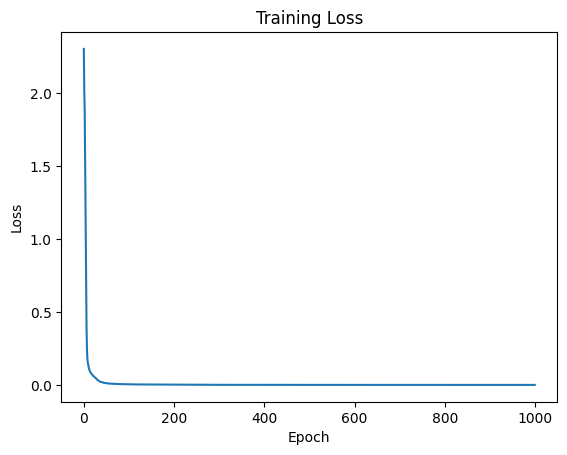

loss after final epoch: 0.00043452530197944737
Example predictions of model: 
x:0.4 y:[[0.1717219]]
x:0.5 y:[[0.24908155]]
x:0.7 y:[[0.49592807]]

 if these examples are predicted badly, the model might only perform well on training set


In [69]:
# We test the model created above on the simple function y = x^2

model = NumPyNeuralNet(1, 30, 1)

# Create a randomly distributed array of 1000 values between 0 and 1
x_train = 1 * np.random.randn(1000, 1)
# Create ground truth by calculating x*x
y_train = x_train * x_train

# Train for default epochs
loss = model.train(x_train, y_train)
print("loss after final epoch: " + str(loss))
example_1 = 0.4
example_2 = 0.5
example_3 = 0.7
print("Example predictions of model: " + "\n" + "x:" + str(example_1) + " y:" + str(model.predict(example_1)) + "\n"
      + "x:" + str(example_2) + " y:" + str(model.predict(example_2)) + "\n" + "x:" + str(example_3) + " y:" + str(model.predict(example_3)))
print("\n if these examples are predicted badly, the model might only perform well on training set")

## Embeddings

### Intrinsic evaluation of embeddings
Word similarity task is often used as an intrinsic evaluation criteria. In the dataset file you will find a list of word pairs with their similarity scores as judged by humans. The task would be to judge how well are the word vectors aligned to human judgement. We will use word2vec embedding vectors trained on the google news corpus. (Ignore the pairs where at least one the words is absent in the corpus)

In [1]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [11]:
# additional libraries from students
from gensim.models import Word2Vec
import torch as torch
import numpy as np
import csv
from torchmetrics import SpearmanCorrCoef

In [7]:
def load_data():
    data = []      
    isFirstLine = True
    for line in open('wordsim353_dataset.csv'):
        if isFirstLine:
            isFirstLine = False
            continue
        indices = [i for i, x in enumerate(line) if x == ","]
        w1 = line[:indices[0]]
        w2 = line[indices[0]+1:indices[1]]
        mean = float(line[indices[1]+1:].rstrip())
        # print(f"w1: {w1}, w2: {w2}, mean: {mean}")
        data.append((w1, w2, mean))
    return data

# data = load_data()
# print(data)

Write a function which takes as input two words and computes the cosine similarity between them.
You do not need to implement the cosine similarity calculation from scratch. Feel free to use any Python library.
Remeber to ignore any pairs where at least one word is absent in the corpus. (2 points)

In [8]:
def similarity(word1, word2):
    # TODO: check missing words
    cos = nn.CosineSimilarity(dim=0)
    output = cos(word1, word2)
    return output


Compute the similarity between all the word pairs in the list and sort them based on the similarity scores. (1 point)

In [9]:
def word2vec(w):
    return torch.from_numpy(wv[w])

In [10]:
def compute_similarity_scores(data):
    # data = load_data()
    scores = []
    
    # # scores = torch.tensor([])

    for w1, w2, mean in data:
        # empty words
        if not w1 or not w2:
            continue

        # word2vec as tensors for cos_score
        w1_vec = torch.from_numpy(wv[w1])
        w2_vec = torch.from_numpy(wv[w2])
        cos_score = similarity(w1_vec, w2_vec)
        
        scores.append([w1, w2, cos_score.item()])
        # # scores = torch.cat((prev_word, word, cos_score.reshape(1)))
    return sorted(scores, key=lambda entry: entry[2])
# sim_scores = compute_similarity_scores(load_data())
# print(len(sim_scores))
# print(sim_scores)

Sort the word pairs in the list based on the human judgement scores. (1 point)

In [11]:
def human_judgement_scores(data):
    # data = load_data()
    return sorted(data, key=lambda entry: entry[2])
# human_scores = human_judgement_scores(loaddata())
# print(human_scores)

Compute spearman rank correlation between the two ranked lists obtained in the previous two steps.
You do not need to implement the spearman rank correlation calculation from scratch. Feel free to use any Python library. (2 points)

In [19]:
def compute_spearman():
    data = load_data()
    print(data)

    sim_score = np.array(compute_similarity_scores(data))
    human_score = np.array(human_judgement_scores(data))

    # use third column of dataset (mean/cos_similarity)
    preds = torch.from_numpy(sim_score[:, 2].astype(float))
    target = torch.from_numpy(human_score[:, 2].astype(float))

    spearman = SpearmanCorrCoef()
    return spearman(preds, target)
compute_spearman()

[('love', 'sex', 6.77), ('tiger', 'cat', 7.35), ('tiger', 'tiger', 10.0), ('book', 'paper', 7.46), ('computer', 'keyboard', 7.62), ('computer', 'internet', 7.58), ('plane', 'car', 5.77), ('train', 'car', 6.31), ('telephone', 'communication', 7.5), ('television', 'radio', 6.77), ('media', 'radio', 7.42), ('drug', 'abuse', 6.85), ('bread', 'butter', 6.19), ('cucumber', 'potato', 5.92), ('doctor', 'nurse', 7.0), ('professor', 'doctor', 6.62), ('student', 'professor', 6.81), ('smart', 'student', 4.62), ('smart', 'stupid', 5.81), ('company', 'stock', 7.08), ('stock', 'market', 8.08), ('stock', 'phone', 1.62), ('stock', 'CD', 1.31), ('stock', 'jaguar', 0.92), ('stock', 'egg', 1.81), ('fertility', 'egg', 6.69), ('stock', 'live', 3.73), ('stock', 'life', 0.92), ('book', 'library', 7.46), ('bank', 'money', 8.12), ('wood', 'forest', 7.73), ('money', 'cash', 9.15), ('professor', 'cucumber', 0.31), ('king', 'cabbage', 0.23), ('king', 'queen', 8.58), ('king', 'rook', 5.92), ('bishop', 'rabbi', 6.69

tensor(1.0000)

### Word embedding based clasifier
We will design a simple sentiment classifier based on the pre-trained word embeddings (google news).

Each data point is a movie review and the sentiment could be either positive (1) or negative (0)

In [3]:
import pickle
with open('sentiment_test_X.p', 'rb') as fs:
    test_X = pickle.load(fs)

len(test_X)

1821

In [4]:
test_X[0]

['If',
 'you',
 'sometimes',
 'like',
 'to',
 'go',
 'to',
 'the',
 'movies',
 'to',
 'have',
 'fun',
 ',',
 'Wasabi',
 'is',
 'a',
 'good',
 'place',
 'to',
 'start',
 '.']

In [22]:
print(wv['fun'])

[ 7.91015625e-02 -1.20117188e-01 -9.42382812e-02  2.69531250e-01
  2.57568359e-02 -3.68652344e-02  9.42382812e-02  2.41210938e-01
 -1.47460938e-01 -8.05664062e-02  2.33398438e-01 -1.42578125e-01
  1.21582031e-01 -1.56250000e-01 -1.23901367e-02  1.92382812e-01
  1.08398438e-01  1.11328125e-01  4.05273438e-02 -2.34375000e-01
  1.85546875e-01  1.97265625e-01  1.35742188e-01  3.10546875e-01
 -1.49414062e-01 -4.67300415e-05  9.03320312e-03 -3.51562500e-02
  6.78710938e-02 -2.33398438e-01 -3.39843750e-01  5.22460938e-02
  3.51562500e-01  1.25000000e-01  3.95507812e-02 -1.98242188e-01
  1.40625000e-01 -1.86523438e-01  2.94921875e-01  3.20312500e-01
  8.54492188e-02 -3.22265625e-01  1.14746094e-01  1.01562500e-01
 -1.54296875e-01 -4.68750000e-02 -2.83203125e-02  1.24511719e-01
  1.91406250e-01  2.31445312e-01 -1.07421875e-01  1.69921875e-01
  8.64257812e-02  8.93554688e-02  9.17968750e-02 -4.66308594e-02
  9.96093750e-02 -3.16406250e-01  6.68945312e-02 -1.08398438e-01
 -1.30859375e-01 -3.56445

In [5]:
with open('sentiment_test_y.p', 'rb') as fs:
    test_y = pickle.load(fs)
    
len(test_y)

1821

In [6]:
test_y[0]

1

In [7]:
with open('sentiment_train_X.p', 'rb') as fs:
    train_X = pickle.load(fs)
with open('sentiment_train_y.p', 'rb') as fs:
    train_y = pickle.load(fs)
with open('sentiment_val_X.p', 'rb') as fs:
    val_X = pickle.load(fs)
with open('sentiment_val_y.p', 'rb') as fs:
    val_y = pickle.load(fs)        

Given a review, compute its embedding by averaging over the embedding of its constituent words. Define a function which given a review as a list of words, generates its embeddings by averaging over the constituent word embeddings. (4 points)

In [45]:
def generate_embedding(review):
    # print([wv[word] for word in review if word in wv])
    print([word for word in review if word in wv])
    print(len(wv['fun']))
    return np.mean([wv[word] for word in review if word in wv], axis=0)

# [word1, word2, word3]
# [wv1, wv2,]

# generate_embedding(test_X[0])
# generate_embedding(train_X[0])


Create a feed-forward network class with pytorch. (Hyperparamter choice such as number of layers, hidden size is left to you) (8 points)

In [46]:
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_1_size, hidden_2_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_1_size = hidden_1_size
        self.hidden_2_size = hidden_2_size
        self.output_size = output_size
        
        self.fc_1 = nn.Linear(self.input_size, self.hidden_1_size)
        self.fc_2 = nn.Linear(self.hidden_1_size, self.hidden_2_size)
        self.fc_3 = nn.Linear(self.hidden_2_size, self.output_size)

        self.relu = nn.ReLU()
        torch.nn.init.xavier_uniform_(self.fc_1.weight)
        torch.nn.init.xavier_uniform_(self.fc_2.weight)
        torch.nn.init.xavier_uniform_(self.fc_3.weight)

    def forward(self, x):
        h_1 = self.relu(self.fc_1(x))
        h_2 = self.relu(self.fc_2(h_1))
        return self.fc_3(h_2)


Create a Dataset class for efficiently enumerating over the dataset. (3 points)

In [55]:
class sent_data(Dataset):
    def __init__(self, data_points, class_labels):
        super(Dataset, self).__init__()
        self.data = data_points
        self.labels = class_labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        d = torch.Tensor(generate_embedding(self.data[index]))
        l = torch.Tensor([self.labels[index]])
        return d,l

Write a train function to train model. At the end of each epoch compute the validation accuracy and save the model with the best validation accuracy. (12 points)

In [56]:
from tqdm import tqdm
from torch.optim import Adam

In [75]:
from tqdm import tqdm
from torch.optim import Adam
# Adopt your code to incorporate mini-batch training
# Use cross-entropy as your loss function
def train(model, train_data, val_data, batch_size, epochs=5, learning_rate=0.001):
    optimizer = Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    for _ in tqdm(range(epochs)): # the models are trained over multiple epochs..
        train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        for d, l in train_dataloader:
            out = model(d)
            print(out)
            print(l)
            l = l.squeeze(1) # converts the tensor of shape [50 x 1] to [50]
            # loss = criterion(out, l)
            loss =  nn.CrossEntropyLoss(out, l)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

Evaluate the trained model on the test set and report the test accuracy. (3 points)

In [76]:
def evaluate(model, test_data):
    pass

In [77]:
train_data = sent_data(train_X, train_y)
test_data = sent_data(test_X, test_y)
model = Classifier(300, 2000, 100, 1)
batch_size = 50
epochs = 5
train(model, train_data, batch_size, epochs)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


['Its', 'appeal', 'will', 'probably', 'limited', 'LDS', 'Church', 'members', 'undemanding', 'armchair', 'tourists']
300
['Such', 'master', 'screenwriting', 'comes', 'courtesy', 'John', 'Pogue', 'the', 'Yale', 'grad', 'who', 'previously', 'gave', 'us', 'The', 'Skulls', 'last', 'year', 'Rollerball']
300
['enough', 'for', 'yet', 'not', 'as', 'hilariously', 'raunchy', 'as', 'South', 'Park', 'this', 'strangely', 'schizo', 'cartoon', 'seems', 'suited', 'neither', 'kids', 'or', 'adults']
300
['Narc', 'is', 'all', 'menace', 'atmosphere']
300
['Certain', 'be', 'distasteful', 'children', 'adults', 'alike', 'Eight', 'Crazy', 'Nights', 'is', 'total', 'misfire']
300
tensor([[-0.0515],
        [-0.0712],
        [-0.0405],
        [-0.0620],
        [-0.0180]], grad_fn=<AddmmBackward0>)
tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.]])


RuntimeError: Boolean value of Tensor with more than one value is ambiguous